In [48]:
###########################예측 값
import os, re, glob

import cv2

import numpy as np

import shutil

from numpy import argmax

from tensorflow.keras.models import load_model
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array
from PIL import Image


 

def Dataization(img_path):
    
    
    image_w = 150

    image_h = 150

    img = mpimg.imread(img_path)

    img = cv2.resize(img, None, fx=image_w/img.shape[1], fy=image_h/img.shape[0])

    return (img/256)

 

def clothes_style(image):
    categories = ["casual","feminine","formal"]
    test = []

    if (image.find('.jpg') is not -1):       
        test.append(Dataization(image))

 

    test = np.array(test)



    model = load_model('clothes_style_vgg.h5')

    predict = model.predict_classes(test)

 

    im=Image.open(image)
    plt.figure()
    
    plt.title(str(categories[predict[0]]),fontsize=30)
    plt.imshow(im)
    print(image + " : , Predict : "+ str(categories[predict[0]]))
    
    return str(categories[predict[0]])




def shoes_color(images):
    test = []
    categories = ["achromatic","dark","pastel","vivid"]

    #images=['./img/test/f0246b7a4d00ba6ca0b5080bdd63f7be.jpg','./img/test/f111fed3b4f5b05d45f49f3c0a630eba.jpg','./img/test/f119de2f1d2dce84c8dbf16d4b4d39f7.jpg']
    result=[]

    for file in images:

        if (file.find('.jpg') is not -1):       

            test.append(Dataization(file))

 

    test = np.array(test)

    model = load_model('cnn_color_basic.h5')

    predict = model.predict_classes(test)

 

    for i in range(len(test)):
        #print(predict[i])
        im=Image.open(images[i])
        plt.figure()
        plt.title(str(categories[predict[i]]),fontsize=30)
        result.append(str(categories[predict[i]]))
        plt.imshow(im)
        print(images[i] + " : , Predict : "+ str(categories[predict[i]]))
    
    return result

def shoes_type(images):
    test = []
    result=[]
    categories = ["boots","hills","ropers","sandals","sneakers"]

    #images=['./img/test/f0246b7a4d00ba6ca0b5080bdd63f7be.jpg','./img/test/f111fed3b4f5b05d45f49f3c0a630eba.jpg','./img/test/f119de2f1d2dce84c8dbf16d4b4d39f7.jpg']


    for file in images:

        if (file.find('.jpg') is not -1):       

            test.append(Dataization(file))

 

    test = np.array(test)

    model = load_model('cnn_shape_vgg.h5')

    predict = model.predict_classes(test)

 

    for i in range(len(test)):
        #print(predict[i])
        im=Image.open(images[i])
        plt.figure()
        plt.title(str(categories[predict[i]]),fontsize=30)
        result.append(str(categories[predict[i]]))
        plt.imshow(im)
        print(images[i] + " : , Predict : "+ str(categories[predict[i]]))
    
    return result



## 가지고 있는 신발 분류 

### 신발 색상/종류 분류 모델

In [49]:

shoes_name = input('가지고 있는 신발을 넣어주세요: ').split()
#['./img/shoes/sneakers/23.jpg','./img/shoes/darkColor/35.jpg','./cnn_color/pastel/pastel38.jpg']
#./img/shoes/sneakers/23.jpg ./img/shoes/darkColor/35.jpg ./cnn_color/pastel/pastel38.jpg

가지고 있는 신발을 넣어주세요: ./img/shoes/sneakers/23.jpg ./img/shoes/darkColor/35.jpg ./cnn_color/pastel/pastel38.jpg


In [50]:
shoes_name

['./img/shoes/sneakers/23.jpg',
 './img/shoes/darkColor/35.jpg',
 './cnn_color/pastel/pastel38.jpg']

./img/shoes/sneakers/23.jpg : , Predict : sneakers
./img/shoes/darkColor/35.jpg : , Predict : ropers
./cnn_color/pastel/pastel38.jpg : , Predict : hills


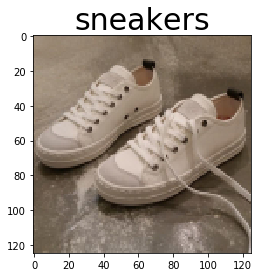

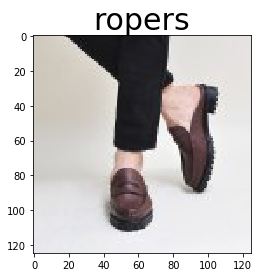

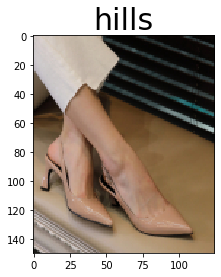

In [51]:
shoes_type=shoes_type(shoes_name)

./img/shoes/sneakers/23.jpg : , Predict : pastel
./img/shoes/darkColor/35.jpg : , Predict : dark
./cnn_color/pastel/pastel38.jpg : , Predict : pastel


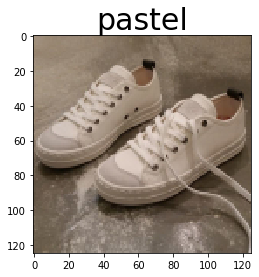

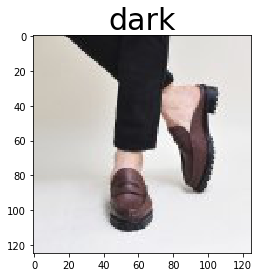

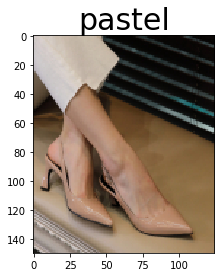

In [52]:
shoes_color=shoes_color(shoes_name)

In [53]:
shoes_name=tuple(shoes_name)
shoes_name

('./img/shoes/sneakers/23.jpg',
 './img/shoes/darkColor/35.jpg',
 './cnn_color/pastel/pastel38.jpg')

In [54]:
shoes={}

for i,name in enumerate(shoes_name):

    color=shoes_color[i]
    style=shoes_type[i]
    shoes[name]={'type':style,'color':color}
    
shoes

{'./img/shoes/sneakers/23.jpg': {'type': 'sneakers', 'color': 'pastel'},
 './img/shoes/darkColor/35.jpg': {'type': 'ropers', 'color': 'dark'},
 './cnn_color/pastel/pastel38.jpg': {'type': 'hills', 'color': 'pastel'}}

 <보유하고 있는 신발> 
./img/shoes/sneakers/23.jpg : sneakersstyle pastel color
./img/shoes/darkColor/35.jpg : ropersstyle dark color
./cnn_color/pastel/pastel38.jpg : hillsstyle pastel color


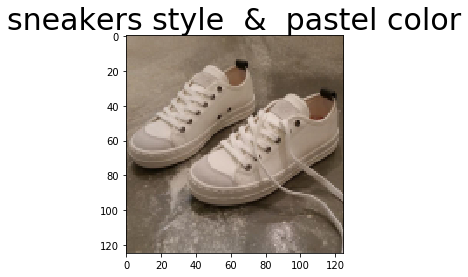

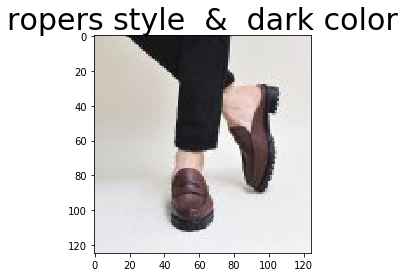

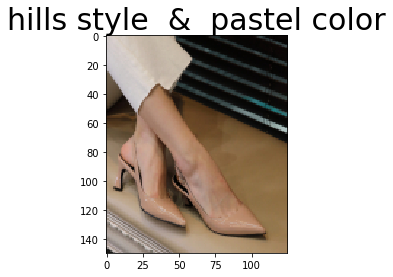

In [55]:
print(' <보유하고 있는 신발> ')
for name in shoes:
    #신발 사진 출력
    im=Image.open(name)
    plt.figure()
    plt.title(shoes[name]['type']+' style  &  ' +shoes[name]['color']+' color',fontsize=30)
    plt.imshow(im)
    print(name+' : '+shoes[name]['type']+'style ' +shoes[name]['color']+' color')

## 옷에 따른 신발 추천

In [56]:
clothes = input('착용할 옷 사진을 넣어주세요: ')
#./img/feminineBody/393.jpg

착용할 옷 사진을 넣어주세요: ./img/feminineBody/393.jpg


In [57]:
type(clothes)

str

### 스타일 분류 모델

./img/feminineBody/393.jpg : , Predict : feminine


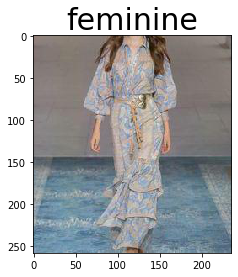

In [58]:
style=clothes_style(clothes)

In [43]:
check=input('원하시는 스타일이 '+style+'이 맞습니까? (YES/NO)')

원하시는 스타일이 feminine이 맞습니까? (YES/NO)YES


In [44]:
if check=='NO':
    style=input('원하는 스타일을 입력해주세요 (formal/feminine/casual)')
    
#스타일 기반 신발종류 추천

### 스타일 기반 신발 종류 추천

In [63]:
import pandas as pd
type_matrix = pd.read_csv("shoes_type_matrix.csv", index_col=0)
type_matrix


,category,formal,casual,feminine
0,0,0.229508,0.241228,0.257143
1,1,0.480874,0.425439,0.457143
2,2,0.188525,0.200292,0.180952
3,3,0.030055,0.035088,0.052381
4,4,0.071038,0.097953,0.052381


### 스타일 기반 신발 색상 추천

In [61]:
color_matrix = pd.read_csv("shoes_color_matrix.csv", index_col=0)
color_matrix

,category,formal,casual,feminine
0,0,0.661202,0.498538,0.461905
1,1,0.071038,0.078947,0.123810
2,2,0.224044,0.346491,0.314286
3,3,0.043716,0.076023,0.100000


### 최종 신발 추천 순위 